In [9]:
import re
import numpy as np
from matplotlib import pyplot as plt



In [10]:
x_train, x_test, y_train, y_test = [],[],[],[]
with open('breast-cancer-wisconsin.data', 'r') as f:
    for line in f:
        line = line.replace('?', '5')
        line = list(map(int, line.split(',')))
        if len(x_train) < 550:
            x_train.append(line[1: 10])
            y_train.append(line[10] // 2 - 1)
        else:
            x_test.append(line[1: 10])
            y_test.append(line[10] // 2 - 1)

In [11]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train).transpose()

In [12]:
ls = []
lr = 0.08
L = 1

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [14]:
w1 = np.random.rand(9, 5)
w2 = np.random.rand(5, 1)
n = len(x_train)

In [20]:
for _ in range(1000):
    Z1 = x_train.dot(w1)
    L1 = sigmoid(Z1)
    Z2 = L1.dot(w2)
    y_hat = sigmoid(Z2)
    dW1 = x_train.transpose().dot(np.multiply(np.multiply(y_hat-y_train,y_hat,1-y_hat).dot(w2.transpose()),L1,1-L1))/n
    dW2 = L1.transpose().dot(np.multiply(y_hat-y_train,y_hat,1-y_hat))/n
    w1 = w1 - lr * dW1
    w2 = w2 - lr * dW2
    L = np.multiply(y_hat-y_train,y_hat-y_train).sum()/(2*n)
    ls.append(L)
    print(L)

0.034699753219687865
0.034693295032581825
0.034686841020935645
0.03468039117795549
0.034673945496857476
0.03466750397086763
0.0346610665932222
0.034654633357167584
0.034648204255960595
0.03464177928286851
0.034635358431169196
0.03462894169415122
0.03462252906511397
0.03461612053736776
0.03460971610423395
0.03460331575904501
0.03459691949514467
0.034590527305888026
0.03458413918464161
0.03457775512478348
0.034571375119703374
0.03456499916280276
0.034558627247494936
0.034552259367205136
0.03454589551537062
0.034539535685440756
0.034533179870877125
0.034526828065153566
0.03452048026175632
0.03451413645418407
0.034507796635948065
0.03450146080057214
0.03449512894159284
0.0344888010525595
0.03448247712703428
0.03447615715859233
0.03446984114082174
0.03446352906732371
0.03445722093171257
0.03445091672761588
0.034444616448674484
0.034438320088542584
0.034432027640887784
0.03442573909939117
0.03441945445774741
0.034413173709664735
0.03440689684886504
0.034400623869084
0.03439435476407101
0.034

0.0315829668281265
0.03157816039254611
0.03157335616179546
0.031568554134232506
0.03156375430821739
0.03155895668211248
0.03155416125428231
0.03154936802309366
0.03154457698691552
0.03153978814411908
0.03153500149307775
0.03153021703216717
0.03152543475976521
0.03152065467425193
0.031515876774009646
0.03151110105742292
0.03150632752287853
0.03150155616876552
0.03149678699347517
0.031492019995400994
0.03148725517293878
0.03148249252448659
0.03147773204844473
0.031472973743215796
0.03146821760720467
0.031463463638818495
0.031458711836466716
0.0314539621985611
0.03144921472351569
0.03144446940974685
0.03143972625567327
0.03143498525971596
0.03143024642029828
0.031425509735845895
0.03142077520478687
0.03141604282555162
0.03141131259657288
0.03140658451628582
0.03140185858312797
0.03139713479553925
0.031392413151962006
0.03138769365084097
0.03138297629062334
0.031378261069758676
0.031373547986699064
0.031368837039899
0.03136412822781546
0.03135942154890787
0.03135471700163818
0.031350014584

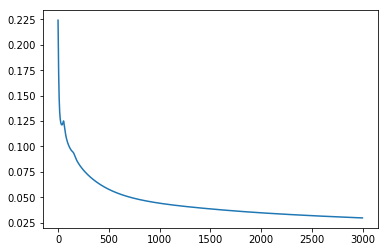

In [21]:
plt.plot(ls)

In [17]:
data = np.array(x_test)

In [18]:
a = sigmoid(sigmoid(data.dot(w1)).dot(w2))

In [26]:
a

matrix([[0.12652314],
        [0.13910189],
        [0.16848709],
        [0.73097277],
        [0.19536457],
        [0.60659149],
        [0.33953949],
        [0.1743236 ],
        [0.1469557 ],
        [0.09938061],
        [0.09067254],
        [0.09067254],
        [0.13910189],
        [0.12652314],
        [0.10909407],
        [0.79185411],
        [0.13538739],
        [0.25535042],
        [0.764592  ],
        [0.76774431],
        [0.75670902],
        [0.79184481],
        [0.12652314],
        [0.17317827],
        [0.78068481],
        [0.10716646],
        [0.09938061],
        [0.17317827],
        [0.17317827],
        [0.13910189],
        [0.1208451 ],
        [0.79179886],
        [0.79170742],
        [0.19536457],
        [0.16498202],
        [0.29598637],
        [0.79183474],
        [0.11432354],
        [0.76387615],
        [0.13540352],
        [0.45096759],
        [0.79171672],
        [0.74587447],
        [0.17588619],
        [0.79082554],
        [0

In [27]:
len(a)
X = []

In [28]:
for x in a:
    if x >= 0.5:
        X.append(1)
    else:
        X.append(0)
X       

[0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

In [29]:
count = 0
for x in range(len(a)):
    if X[x] == y_test[x]:
        count+= 1
y_test        

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1]

In [30]:
count / len(y_test)

0.9060402684563759